In [1]:
!pip install kaggle

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


Importing face mask dataset

In [3]:
#API to fetch the dataset from kaggle
!kaggle datasets download -d omkargurav/face-mask-dataset

Dataset URL: https://www.kaggle.com/datasets/omkargurav/face-mask-dataset
License(s): unknown
100% 163M/163M [00:04<00:00, 42.8MB/s]
100% 163M/163M [00:04<00:00, 36.9MB/s]


In [4]:
#extracting the compressed dataste
from zipfile import ZipFile
dataset="/content/face-mask-dataset.zip"

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [5]:
!ls

data  face-mask-dataset.zip  sample_data


Two folders in the new folder data : with_mask and without_mask

Importing dependencies

In [6]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2 #img processing
from google.colab.patches import cv2_imshow #create a new window and deplate it in new window
from PIL import Image #pillow imag processing
from sklearn.model_selection import train_test_split

In [7]:
with_mask_files=os.listdir('/content/data/with_mask')
print(with_mask_files[:10])

['with_mask_3329.jpg', 'with_mask_1848.jpg', 'with_mask_1909.jpg', 'with_mask_496.jpg', 'with_mask_518.jpg', 'with_mask_3663.jpg', 'with_mask_2709.jpg', 'with_mask_100.jpg', 'with_mask_664.jpg', 'with_mask_227.jpg']


In [8]:
without_mask_files=os.listdir('/content/data/without_mask')
print(with_mask_files[:10])

['with_mask_3329.jpg', 'with_mask_1848.jpg', 'with_mask_1909.jpg', 'with_mask_496.jpg', 'with_mask_518.jpg', 'with_mask_3663.jpg', 'with_mask_2709.jpg', 'with_mask_100.jpg', 'with_mask_664.jpg', 'with_mask_227.jpg']


In [9]:
print("number of with mask images :",len(with_mask_files))

number of with mask images : 3725


In [10]:
print("number of with mask images :",len(without_mask_files))

number of with mask images : 3828


creating labels for the two class images


with mask --> 1
without mask --> 0

In [11]:
#creating labels
with_mask_labels= [1]*3725
without_mask_labels=[0]*3828

In [12]:
print(with_mask_labels[:10])

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [13]:
print(without_mask_labels[:10])

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [14]:
print(len(with_mask_labels))
print(len(without_mask_labels))

3725
3828


In [15]:
labels = with_mask_labels + without_mask_labels
print(len(labels))

7553


Displaying the images

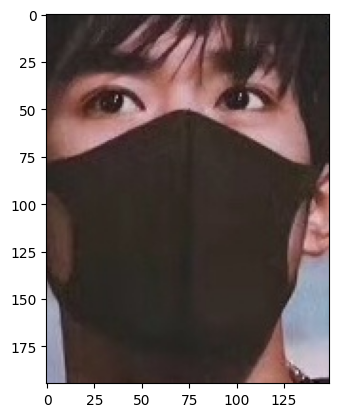

In [16]:
# displaying with mask image
img= mpimg.imread('/content/data/with_mask/with_mask_1500.jpg')
imgplot=plt.imshow(img)
plt.show()

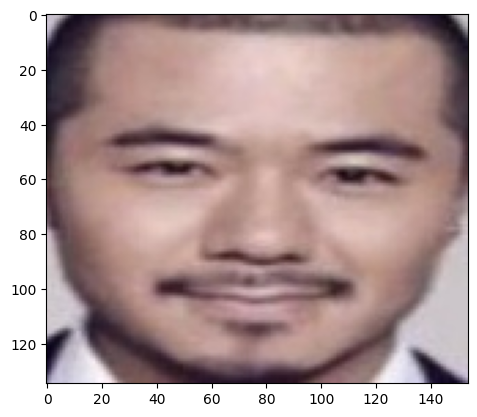

In [17]:
# displaying without mask image
img= mpimg.imread('/content/data/without_mask/without_mask_10.jpg')
imgplot=plt.imshow(img)
plt.show()

Image processing



1.   resize the images
2.   convert images to numpy arrays



In [18]:
#convert images to numpy arrays

with_mask_path ="/content/data/with_mask/"
data = []
for img_file in with_mask_files:
  image=Image.open(with_mask_path + img_file)
  image=image.resize((128,128))
  image=image.convert("RGB")
  image=np.array(image)
  data.append(image)

#convert images to numpy arrays

without_mask_path ="/content/data/without_mask/"

for img_file in without_mask_files:
  image=Image.open(without_mask_path + img_file)
  image=image.resize((128,128))
  image=image.convert("RGB")
  image=np.array(image)
  data.append(image)

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [19]:
len(data)

7553

In [20]:
data[0].shape

(128, 128, 3)

In [21]:
type(data[0])

numpy.ndarray

In [49]:
#convert image list (data) and label list to numpy array

X=np.array(data)
Y=np.array(labels)

In [50]:
print(X.shape)

(7553, 128, 128, 3)


train test split

In [51]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=2)

In [52]:
print(X.shape,X_train.shape,X_test.shape)

(7553, 128, 128, 3) (6042, 128, 128, 3) (1511, 128, 128, 3)


In [53]:
#scaling data black color 0 white color as 1
X_train_scaled=X_train/255
X_test_scaled=X_test/255

# Building a convolutional neural networs(cnn)

In [54]:
import tensorflow as tf
from tensorflow import keras

In [55]:
num_of_classes=2

model = keras.Sequential()
#filter size is 32
model.add(keras.layers.Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())
#number of neurons is 128
model.add(keras.layers.Dense(128,activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64,activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(num_of_classes,activation='sigmoid'))


In [61]:
#compile the neural network
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['acc'])

In [62]:
#training the neural network
history=model.fit(X_train_scaled,Y_train,validation_split=0.1,epochs=5)

Epoch 1/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 12s 44ms/step - acc: 0.9156 - loss: 0.2174 - val_acc: 0.9372 - val_loss: 0.1777
Epoch 2/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - acc: 0.9262 - loss: 0.1960 - val_acc: 0.9339 - val_loss: 0.1810
Epoch 3/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - acc: 0.9485 - loss: 0.1438 - val_acc: 0.9355 - val_loss: 0.1718
Epoch 4/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - acc: 0.9478 - loss: 0.1262 - val_acc: 0.9074 - val_loss: 0.4085
Epoch 5/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - acc: 0.9520 - loss: 0.1468 - val_acc: 0.9322 - val_loss: 0.2054


model evaluation

In [63]:
loss , accuracy = model.evaluate(X_test_scaled,Y_test)
print('Test Accuracy =',accuracy)

48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - acc: 0.9053 - loss: 0.2806
Test Accuracy = 0.9060224890708923


loss : whats the diffrence between the true and predicted value

if your loss decreases the accuracy increases

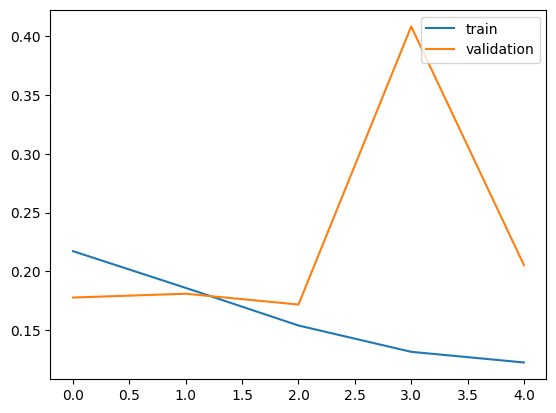

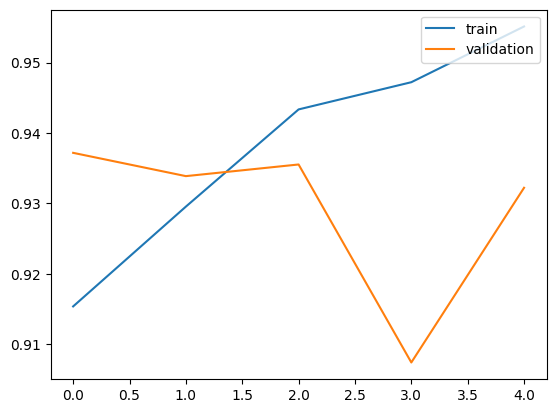

In [64]:
h =history
#plot the loss value
plt.plot(h.history['loss'],label='train loss')
plt.plot(h.history['val_loss'],label='validation loss')
plt.legend(['train','validation'],loc='upper right')
plt.show()

#plot the accuracy value
plt.plot(h.history['acc'],label='train acc')
plt.plot(h.history['val_acc'],label='validation acc')
plt.legend(['train','validation'],loc='upper right')
plt.show()

# predictive system

enter the path of the image to be predicted:/content/images.jpg


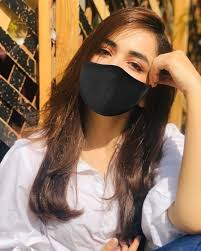

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 252ms/step
[[0.14905342 0.9502448 ]]
1
the person in the image is with mask


In [65]:
input_image_path=input('enter the path of the image to be predicted:')
input_image=cv2.imread(input_image_path)
cv2_imshow(input_image)
input_image_resize=cv2.resize(input_image,(128,128))
input_image_scaled=input_image_resize/255
input_image_reshaped=np.reshape(input_image_scaled,[1,128,128,3])
input_prediction=model.predict(input_image_reshaped)
print(input_prediction)
input_pred_label=np.argmax(input_prediction)
print(input_pred_label)

if input_pred_label==1:
  print('the person in the image is with mask')
else :
  print('the person in the image is without mask')